# Dartmouth Robotics // AI

## Demo: Building a Neural Network

### 1. Imports

In [1]:
import numpy as np                              # for working with arrays
import pandas as pd                             # for data manipulation
import matplotlib.pyplot as plt                 # for visualization

from IPython.display import display, Markdown   # for displaying outputs

from utils import load_data, visualize, ConvNet, DenseLayer

### 2. Loading the MNIST Data

In [2]:
dataset = load_data()
dataset

{'train': {'images': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  'labels': array([[0., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 1., 0.]])},
 'test': {'images': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  'labels': array([[0., 0., 0., ..., 1., 0., 0.],
         [0., 0., 1., ..., 0., 0., 0.],
         [0., 1., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
      

In [3]:
display(Markdown(f"""
#### Dataset Info

| Metric | Value |
| :--- | ---: |
| Number of Train Samples | {len(dataset["train"]["images"])} |
| Number of Test Samples | {len(dataset["test"]["images"])} |
| Number of Classes | {len(dataset["train"]["labels"][0])} |
"""))


#### Dataset Info

| Metric | Value |
| :--- | ---: |
| Number of Train Samples | 60000 |
| Number of Test Samples | 10000 |
| Number of Classes | 10 |


In [10]:
display(Markdown(f"""
#### Dataset Info

| Metric | Value |
| :--- | ---: |
| Number of Train Samples | {len(dataset["train"]["images"])} |
| Number of Test Samples | {len(dataset["test"]["images"])} |
| Number of Classes | {len(dataset["train"]["labels"][0])} |
"""))




#### Dataset Info

| Metric | Value |
| :--- | ---: |
| Number of Train Samples | 60000 |
| Number of Test Samples | 10000 |
| Number of Classes | 10 |


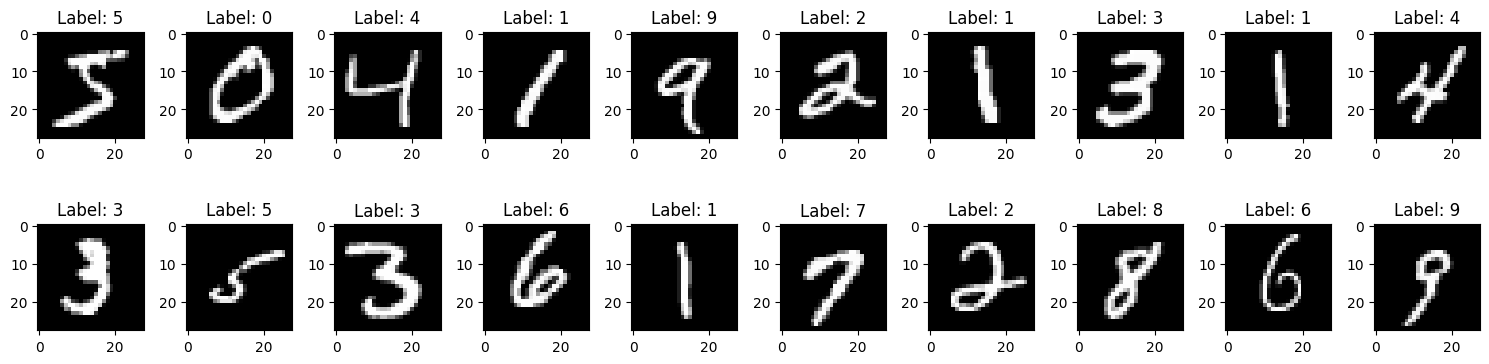

In [11]:
visualize(dataset["train"]["images"], dataset["train"]["labels"], rows = 2, cols = 10)

In [12]:
dataset["train"]["images"][0].shape

(784,)

In [13]:
network = ConvNet()
network.add(DenseLayer(6, "sigmoid"))
network.add(DenseLayer(10, "softmax"))
network.initialize(dataset["train"]["images"][0].shape[0])
print(network)

in: 784, neurons: 6, activation: sigmoid
in: 6, neurons: 10, activation: softmax


In [17]:
# hazard a guess
prediction = network(dataset["train"]["images"][0])

print(f"{np.argmax(prediction) = }\n")
for i, p in enumerate(prediction):
  print(f"{i}: {p}")

print(f"\n{prediction.sum() = }")
print(f"\n{prediction.shape = }")


np.argmax(prediction) = 8

0: 0.03831168916600217
1: 0.0845179254647245
2: 0.002496989409012652
3: 0.004060515845746126
4: 0.007424465017723204
5: 0.03912062121222006
6: 0.00971224473075783
7: 0.005850828181417974
8: 0.7473076293285613
9: 0.0611970916438342

prediction.sum() = 1.0

prediction.shape = (10,)


### Training

In [18]:
print(network.layers[0].weights)

[[-1.06542123  0.41833827 -0.0400011  ...  0.34111783 -1.15419784
  -0.09080114]
 [-0.36716476 -1.29712094  0.2211807  ... -0.2149424   1.32725117
  -0.11928728]
 [ 1.4553612  -0.66107492  0.48119934 ... -1.38071465  1.80622617
  -0.0664159 ]
 [-1.1693062   0.85567567  0.60208892 ... -0.65389173  0.4365534
   0.03868063]
 [ 0.14591093  1.44324053 -0.20466983 ... -0.15711406  1.01178104
   2.03958756]
 [-0.54006672  0.85099953 -0.80320777 ... -0.83856726 -0.15914888
  -2.35575445]]


In [19]:
network.train(dataset, epochs=500, batch_size=128, learning_rate=0.01)

Epoch     0 of   500: 3.930713890522805
Epoch   100 of   500: 2.7163020428584823
Epoch   200 of   500: 2.6891504046734633
Epoch   300 of   500: 2.8318592050891715
Epoch   400 of   500: 2.672303108231669


In [29]:
# evaluate

point = 100
prediction = network(dataset["test"]["images"][point])
print(f"{list(prediction) = }")
print(f"{np.argmax(prediction) = }")
print(f"{np.argmax(dataset['test']['labels'][point]) = }")

list(prediction) = [0.1427243841401076, 0.001107161430056867, 0.09987985983549794, 0.1061628960057283, 0.17565808865835528, 0.12723578623452206, 0.02198516380925469, 0.014225664041751181, 0.0004147829889519194, 0.3106062128557742]
np.argmax(prediction) = 9
np.argmax(dataset['test']['labels'][point]) = 6


In [30]:
print(network.layers[0].weights)

[[-9.74095624e-01  5.09663878e-01  5.13245083e-02 ...  4.32443443e-01
  -1.06287223e+00  5.24468658e-04]
 [-2.75839148e-01 -1.20579533e+00  3.12506311e-01 ... -1.23616785e-01
   1.41857678e+00 -2.79616696e-02]
 [ 1.54668681e+00 -5.69749308e-01  5.72524955e-01 ... -1.28938904e+00
   1.89755178e+00  2.49097142e-02]
 [-1.07798059e+00  9.47001281e-01  6.93414533e-01 ... -5.62566123e-01
   5.27879014e-01  1.30006244e-01]
 [ 2.37236540e-01  1.53456614e+00 -1.13344224e-01 ... -6.57884453e-02
   1.10310665e+00  2.13091317e+00]
 [-4.48741110e-01  9.42325139e-01 -7.11882161e-01 ... -7.47241653e-01
  -6.78232674e-02 -2.26442884e+00]]
